In [14]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from time import time


In [15]:
def gerarCanditadoVizinho(x, e):
    """
    Gera um candidato vizinho de x.
    """
    return np.random.uniform(low= x - e, high= x + e)

def hillClimbing(f, x0, e= 0.1, max_iter= 1000, max_vizinhos= 1000):
    """
    f: função a ser otimizada,
    x0: o valor inicial (nesse problema usaremos o valor do limite inferior do domínio),
    e: o tamanho do passo,
    max_iter: o número máximo de iterações.
    """
    i = 0
    xAtual = x0
    fAtual = f(xAtual)
    melhoria = True
    while melhoria and i < max_iter:
        melhoria = False
        for j in range(max_vizinhos):
            x_vizinho = gerarCanditadoVizinho(xAtual, e)
            f_vizinho = f(x_vizinho)
            if f_vizinho > fAtual:
                xAtual = x_vizinho
                fAtual = f_vizinho
                melhoria = True
                break       
        i += 1

    return xAtual, fAtual

        

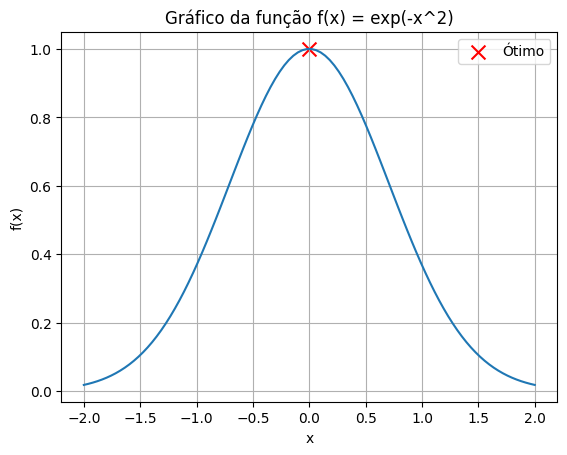

In [16]:

# Definir a função
def f(x):
    return np.exp(-x**2)


dominio = (-2, 2)

def plotarFuncao(f, dominio, funcaoNome= 'f(x)') -> None:
    """
    Plota a função f usando o dominio fornecido.
    """
    x = np.linspace(dominio[0], dominio[1], 100)
    y = f(x)

    # Função
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Gráfico da função {funcaoNome}')
    plt.grid(True)

    # Marcar o ponto ótimo
    xOtimo, fOtimo = hillClimbing(f, dominio[0])
    plt.scatter(xOtimo, fOtimo, color= 'red', label= 'Ótimo', s= 100, marker= 'x')
    plt.legend()


    plt.show()



plotarFuncao(f, dominio, 'f(x) = exp(-x^2)')

    


In [17]:
def gerarCanditadoVizinho(x, e):
    """
    Gera um candidato vizinho de x.
    """
    return np.random.uniform(low= x - e, high= x + e)

def hillClimbing2(f, x0, y0, e= 0.1, max_iter= 1000, max_vizinhos= 1000):
    """
    f: função a ser otimizada,
    x0: o valor inicial em X (nesse problema usaremos o valor do limite inferior do domínio),
    y0: o valor inicial em Y (nesse problema usaremos o valor do limite inferior do domínio),
    e: o tamanho do passo,
    max_iter: o número máximo de iterações.
    """
    i = 0
    xAtual = x0
    yAtual = y0
    fAtual = f(xAtual, yAtual)
    melhoria = True
    while melhoria and i < max_iter:
        melhoria = False
        for j in range(max_vizinhos):
            x_vizinho = gerarCanditadoVizinho(xAtual, e)
            y_vizinho = gerarCanditadoVizinho(yAtual, e)
            f_vizinho = f(x_vizinho, y_vizinho)
            if f_vizinho > fAtual:
                xAtual = x_vizinho
                yAtual = y_vizinho
                fAtual = f_vizinho
                melhoria = True
                break       
        i += 1

    return xAtual, yAtual, fAtual

        

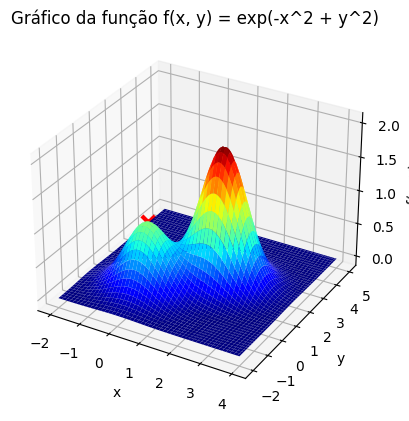

In [20]:
# Definir a função
def f(x, y):
    return x**2 + y**2

def f2(x, y):
    return np.exp(-(x**2 + y**2)) + 2*np.exp(-((x-1.7)**2 + (y-1.7)**2))


dominioX = (-2, 4)
dominioY = (-2, 5)


def plotarFuncao3D(f, dominioX, dominioY, funcaoNome= 'f(x, y)') -> None:
    """
    Plota a função f em 3D usando o domínio fornecido.
    """
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    x = np.linspace(dominioX[0], dominioX[1], 100)
    y = np.linspace(dominioY[0], dominioY[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    ax.plot_surface(X, Y, Z, cmap= 'jet')

    # Marcar o ponto ótimo
    x1_otimo, x2_otimo, f_otimo= hillClimbing2(f, dominioX[0], dominioY[0])
    ax.scatter (x1_otimo , x2_otimo , f_otimo , marker= 'x',s= 90, linewidth= 3, color='red', label= 'Ótimo')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title(f'Gráfico da função {funcaoNome}')

    plt.show()

plotarFuncao3D(f2, dominioX, dominioY, 'f(x, y) = exp(-x^2 + y^2)')
  






## Questão 2

### Questão 2.1

In [ ]:
x = [5, 1, 4, 2, 6, 1, 4, 7]

def rainhasCombatentes(rainhas: list) -> int:
    """
    Retorna o número de rainhas combatentes no tabuleiro.
    """
    n = len(rainhas)
    combatentes = 0
    for i in range(n):
        for j in range(i+1, n):
            if rainhas[i] == rainhas[j] or abs(rainhas[i] - rainhas[j]) == abs(i - j):
                combatentes += 1
    return combatentes

def funcaoAptidao(rainhas: list) -> int:
    """
    Retorna a aptidão de um tabuleiro de xadrez.
    """
    return 28 - rainhasCombatentes(rainhas)


funcaoAptidao(x)    


21

### Questão 2.2

In [ ]:
T = 100

### Questão 2.3

In [ ]:
def decaiTemperatura(T: float) -> float:
    return T * 0.99

### Questão 2.4

In [ ]:
def perturb(x: list) -> list:
    i1,i2 = np.random.permutation(len(x))[0:2]
    x[i1],x[i2] = x[i2],x[i1]
    return x

### Questão 2.5

In [21]:
max_permutacoes = 92
combinacoes = set()

x_opt = np.random.permutation(8) + 1
f_opt = funcaoAptidao(x_opt)


tempoInicial = time()

while len(combinacoes) < max_permutacoes:
    x_cand = perturb(x_opt.copy())
    f_cand = funcaoAptidao(x_cand)

    P_ij = np.exp(-((f_cand - f_opt) / T))

    if f_cand > f_opt or P_ij > np.random.uniform(0, 1):
        x_opt = x_cand
        f_opt = f_cand

        if f_opt == 28:
            if len(combinacoes) == 0:
                tempoPrimeiraCombinacao = time() - tempoInicial
            
            if tuple(x_opt) not in combinacoes:
                combinacoes.add(tuple(x_opt))

    T = decaiTemperatura(T)

tempoTotal = time() - tempoInicial

print(f'Número de combinações: {len(combinacoes)}')
print(f'Tempo para a primeira combinação: {tempoPrimeiraCombinacao}')
print(f'Tempo total: {tempoTotal}')
            

Número de combinações: 92
Tempo para a primeira combinação: 0.0010006427764892578
Tempo total: 5.3240156173706055
